# Model Selection using RFE (Bike Rental Assignment)



## Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import all the necessary librabries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read data into a dataframe.
BikeRent = pd.read_csv('day.csv')

In [4]:
##Initial analysis of Dataframe
BikeRent.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
##Initial analysis of shape Dataframe
BikeRent.shape

(730, 16)

In [6]:
##Detailed information of the dataframe.
BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
BikeRent.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
## Checking what do the values in the weekday column actually mean. 
BikeRent[(BikeRent.workingday==0)]["weekday"].value_counts()


6    105
0    105
1     15
5      2
4      2
3      1
2      1
Name: weekday, dtype: int64

### Weekdays Association. 
Its clear from above output that 6 and 0 are weekends as they have the highest number of holidays and only a weekend will have that many holiday. 

## Data Preparation

### We are adding replacing values in the dataset as per the data dictionary provided below. 
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [9]:
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
BikeRent['season'] = BikeRent['season'].map(season_map)
BikeRent.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
weekday_map = {0:'SUN', 1:'MON', 2:'TUE', 3:'WED', 4:'THU' , 5:'FRI', 6:'SAT'}
BikeRent['weekday'] = BikeRent['weekday'].map(weekday_map)
BikeRent.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,SAT,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,SUN,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,MON,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,TUE,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,WED,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
mnth_map = {1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG' , 9:'SEP', 10:'OCT',11:'NOV',12:'DEC'}
BikeRent['mnth'] = BikeRent['mnth'].map(mnth_map)
BikeRent.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,JAN,0,SAT,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,JAN,0,SUN,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,JAN,0,MON,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,JAN,0,TUE,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,JAN,0,WED,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
weathersit_map = {1:'CLEAR', 2:'MIST+CLOUDY', 3:'LIGHT SNOW', 4:'HEAVY RAIN'}
BikeRent['weathersit'] = BikeRent['weathersit'].map(weathersit_map)
BikeRent.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,JAN,0,SAT,0,MIST+CLOUDY,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,JAN,0,SUN,0,MIST+CLOUDY,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,JAN,0,MON,1,CLEAR,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,JAN,0,TUE,1,CLEAR,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,JAN,0,WED,1,CLEAR,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## EDA 

In [13]:
#Getting Descriptive insights from the data Frame:
BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


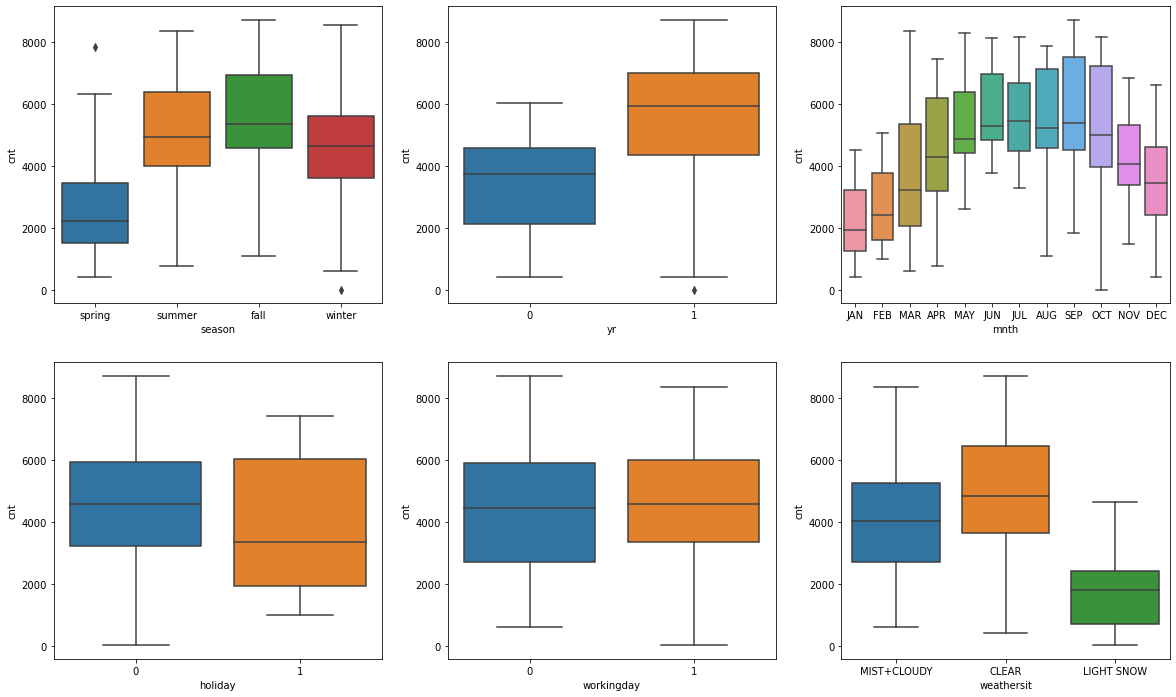

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeRent)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BikeRent)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeRent)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeRent)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeRent)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeRent)
plt.show()

### Inference from the box plots:

- from the above boxplots we can infer the following: 
- Fall season has the highest number of bike rentals followed by summer. 
- Year 2019 has higher rentals than 2018
- When it comes to Months, the sales have a positive trajectory from Jan to July, then a downward trend from July to Dec. 
- July has the highes bike rentals. 
- A user is more likely to rent a bike on a holiday than a working day as per EDA. 
- A user is more likely to rent a bike when the weather is "clear" and less likely to rent it when it snows.


### Data Cleaning

dropping the columns which are not useful as per our EDA. 

In [15]:
## From our EDA we realise that below columsn/variables do not have any impact on our outcome, hence we are dropping them. 
BikeRent.drop(['dteday','instant','casual','registered'], axis=1, inplace=True)
BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Dummy Variable 

Now we introduce dummy variables for the categorical columns that multiple levels. 
- please note that we are using drop_first = True because we onl N-1 dummies for N levels. 

In [16]:
season_dummies = pd.get_dummies(BikeRent['season'], drop_first = True)
season_dummies

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
weathersit_dummies = pd.get_dummies(BikeRent['weathersit'], drop_first = True)
weathersit_dummies.head()

,LIGHT SNOW,MIST+CLOUDY
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [18]:
weekday_dummies = pd.get_dummies(BikeRent['weekday'], drop_first = True)
weekday_dummies.head()

,MON,SAT,SUN,THU,TUE,WED
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [19]:
mnth_dummies = pd.get_dummies(BikeRent['mnth'], drop_first = True)
mnth_dummies.head()

,AUG,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


## ConCat the dummies to the main dataframe

Now that we have the dummies created we will concat them into the main Datafram for our further process. 

In [20]:
BikeRent_ConCat = pd.concat([BikeRent,season_dummies,weathersit_dummies,weekday_dummies,mnth_dummies ], axis = 1)

In [21]:
#DF info after the concatnation.
BikeRent_ConCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   hum          730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  LIGHT SNOW   730 non-null    uint8  
 16  MIST+CLOUDY  730 non-null    uint8  
 17  MON          730 non-null    uint8  
 18  SAT          730 non-null    uint8  
 19  SUN     

# Deleting the parent dummy variable:
- Now that we have the levels added as saparate columns we do not need the parent columns. Hence we drop them. 

In [22]:
BikeRent_ConCat.drop(['season','mnth','weathersit','weekday'], axis=1, inplace=True)
BikeRent_ConCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   spring       730 non-null    uint8  
 9   summer       730 non-null    uint8  
 10  winter       730 non-null    uint8  
 11  LIGHT SNOW   730 non-null    uint8  
 12  MIST+CLOUDY  730 non-null    uint8  
 13  MON          730 non-null    uint8  
 14  SAT          730 non-null    uint8  
 15  SUN          730 non-null    uint8  
 16  THU          730 non-null    uint8  
 17  TUE          730 non-null    uint8  
 18  WED          730 non-null    uint8  
 19  AUG     

## Pair Plot for Numeric Variables to find out correlations. 

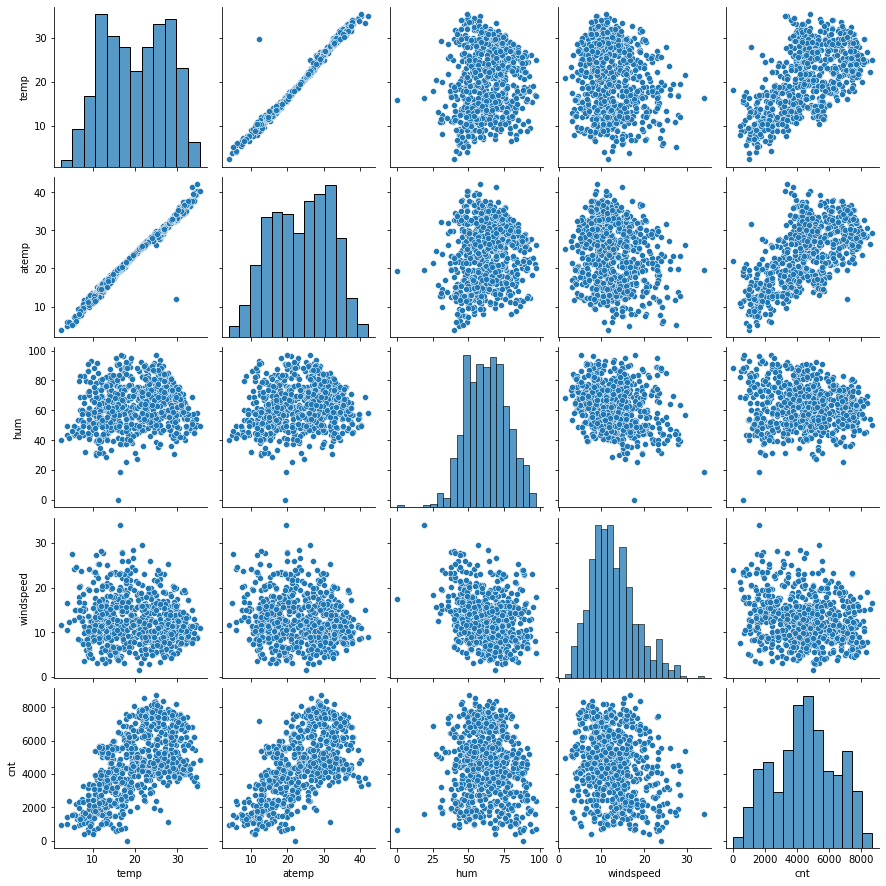

In [23]:
## Only for the numeric variables.
sns.pairplot(BikeRent_ConCat[['temp','atemp','hum','windspeed','cnt']])
plt.show()

## Inferences: 
- We see that temp and atemp are highly correlated with cnt.
- we also see that temp and atemp mutually correlated aswell. 

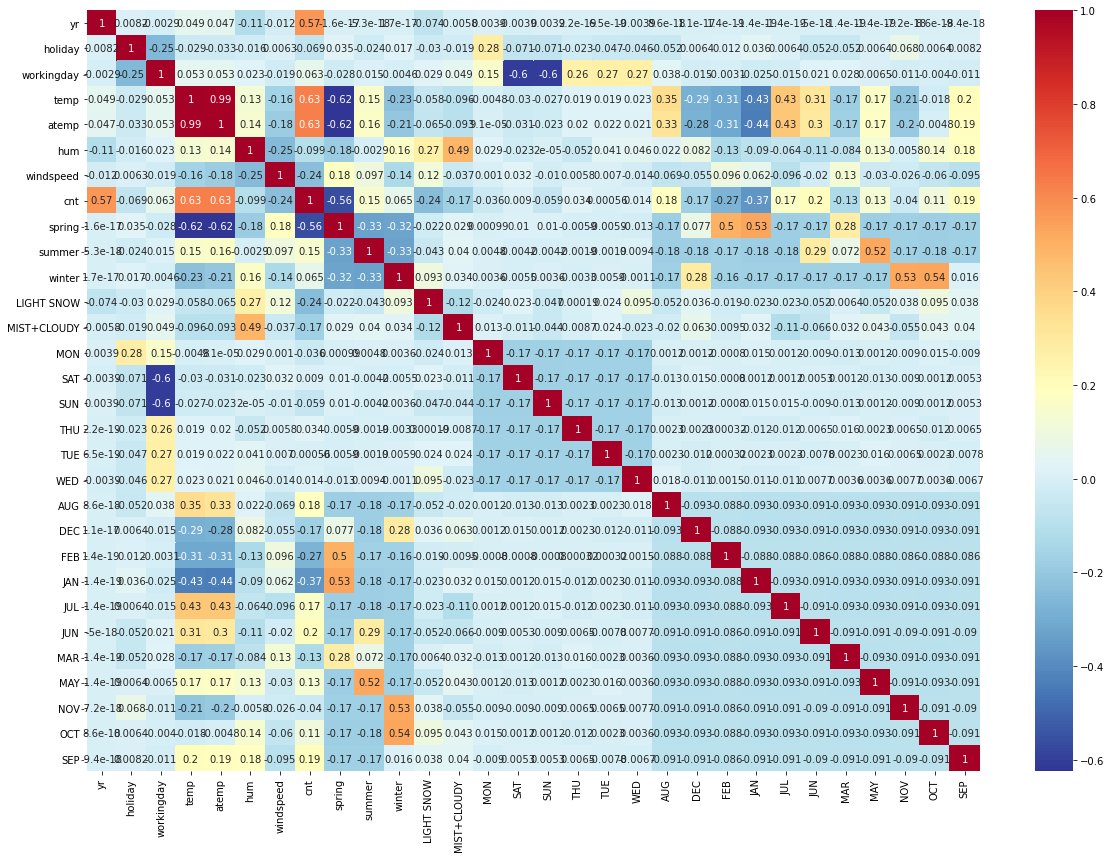

In [24]:
plt.figure(figsize=(20,14))
sns.heatmap(BikeRent_ConCat.corr(), cmap='RdYlBu_r', annot=True); 
plt.show()

### Heat Map confirms our inferences from pair plots. 

atemp and temp are highly correlated and may cause multicollinearity issues. 

# Dropping Variable to avoid multi-collinearity
- We can see that temp and atemp are correlated and it would cause multi=collinearty issues. 
- Hence we drop one of them. Here we preffered actual temp or temp. 

In [25]:
BikeRent_ConCat.drop(['temp'],axis = 1,inplace=True)

## Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(BikeRent_ConCat, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,DEC,FEB,JAN,JUL,JUN,MAR,MAY,NOV,OCT,SEP
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   atemp        510 non-null    float64
 4   hum          510 non-null    float64
 5   windspeed    510 non-null    float64
 6   cnt          510 non-null    float64
 7   spring       510 non-null    uint8  
 8   summer       510 non-null    uint8  
 9   winter       510 non-null    uint8  
 10  LIGHT SNOW   510 non-null    uint8  
 11  MIST+CLOUDY  510 non-null    uint8  
 12  MON          510 non-null    uint8  
 13  SAT          510 non-null    uint8  
 14  SUN          510 non-null    uint8  
 15  THU          510 non-null    uint8  
 16  TUE          510 non-null    uint8  
 17  WED          510 non-null    uint8  
 18  AUG          510 non-null    uint8  
 19  DEC    

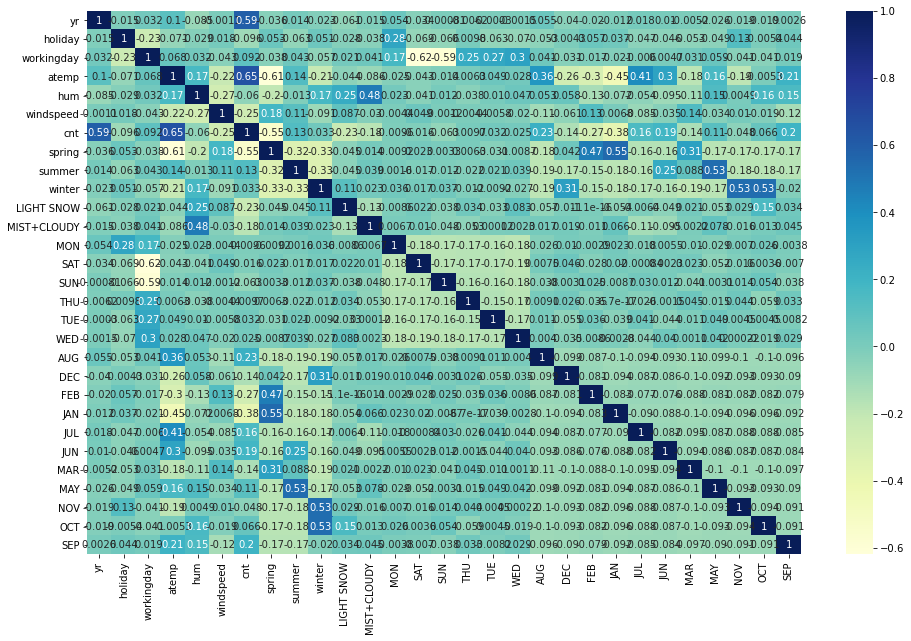

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
import statsmodels.api as sm

X_train_init = X_train
# Add a constant
X_train_init = sm.add_constant(X_train_init)

# Create a first fitted model
lr_model = sm.OLS(y_train, X_train_init).fit()

In [34]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          4.12e-180
Time:                        20:43:25   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2617      0.035      7.468      

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('LIGHT SNOW', True, 1),
 ('MIST+CLOUDY', True, 1),
 ('MON', False, 9),
 ('SAT', True, 1),
 ('SUN', False, 5),
 ('THU', False, 11),
 ('TUE', False, 10),
 ('WED', False, 13),
 ('AUG', False, 6),
 ('DEC', True, 1),
 ('FEB', False, 3),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 8),
 ('MAR', False, 14),
 ('MAY', False, 4),
 ('NOV', True, 1),
 ('OCT', False, 12),
 ('SEP', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'LIGHT SNOW', 'MIST+CLOUDY', 'SAT', 'DEC', 'JAN', 'JUL', 'NOV', 'SEP'],
      dtype='object')

In [39]:
col_negate = X_train.columns[~rfe.support_]
col_negate

Index(['workingday', 'summer', 'MON', 'SUN', 'THU', 'TUE', 'WED', 'AUG', 'FEB',
       'JUN', 'MAR', 'MAY', 'OCT'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'LIGHT SNOW', 'MIST+CLOUDY', 'SAT', 'DEC', 'JAN', 'JUL', 'NOV', 'SEP'],
      dtype='object')

### Using statsmodel, for the detailed statistics

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_1 = sm.add_constant(X_train_rfe)

In [43]:
lm_model_1 = sm.OLS(y_train,X_train_rfe_1).fit()   # Running the linear model

In [44]:
print(lm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 05 May 2021   Prob (F-statistic):          9.67e-187
Time:                        20:43:26   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3662      0.032     11.425      

### `Sat` is insignificant hence dropping the column and running another model. 

In [45]:
X_train_rfe = X_train_rfe.drop(["SAT"], axis = 1)

In [46]:
X_train_rfe_2 = sm.add_constant(X_train_rfe)

In [47]:
lm_model_2 = sm.OLS(y_train,X_train_rfe_2).fit()

In [48]:
print(lm_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.58e-187
Time:                        20:43:26   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3704      0.032     11.578      

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
8,MIST+CLOUDY,2.26
0,yr,2.06
12,NOV,1.82
10,JAN,1.75
9,DEC,1.54


### High VIF for `hum`
- its clear that hum has high VIF and it implies multicollinearty . 
- Hence we drop the variable. 

In [50]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [51]:
## Running the Model afer dropping hum
X_train_rfe_3 = sm.add_constant(X_train_rfe)
lm_model_3 = sm.OLS(y_train,X_train_rfe_3).fit()
print(lm_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 05 May 2021   Prob (F-statistic):          3.95e-185
Time:                        20:43:26   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2931      0.026     11.396      

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
11,NOV,1.80
9,JAN,1.65
7,MIST+CLOUDY,1.53
8,DEC,1.46
10,JUL,1.35


We can see from aove output that both P values, and VIF are under acceptable limits. Hence we move on to Residual Analysis.

Also we tried removing the next Highest P value "NOV" but that resulted in increase in VIF of atemp. Hence moved on to next step. 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
X_train_rfe_pred = sm.add_constant(X_train_rfe)
y_train_pred = lm_model_3.predict(X_train_rfe_pred)


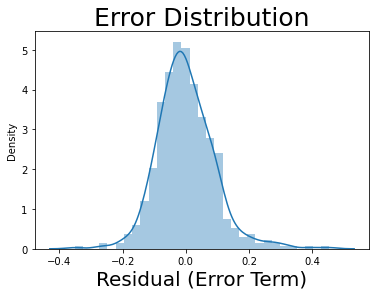

In [55]:
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()


## Clearly Error distribution follows normal distribution. 

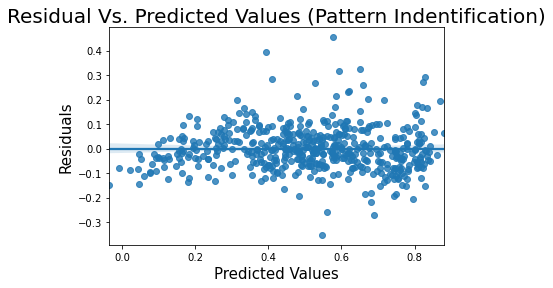

In [56]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()


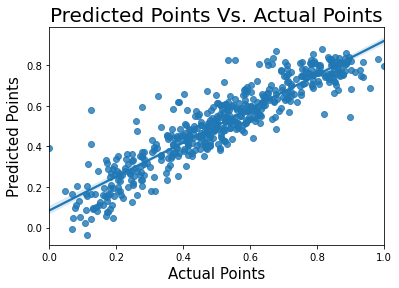

In [57]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()


## Making Predictions

#### Applying the scaling on the test sets


In [58]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_model_1 = X_test[X_train_rfe.columns]
# Adding a constant variable 
X_test_model_1 = sm.add_constant(X_test_model_1)

In [61]:
y_pred = lm_model_3.predict(X_test_model_1)

## Model Evaluation

Text(0, 0.5, 'y_pred')

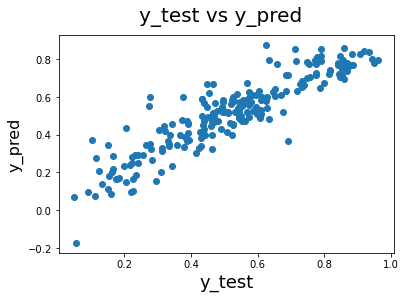

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

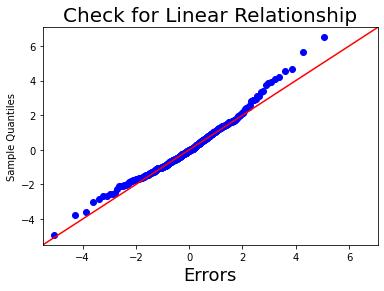

In [63]:
## QQ Plot 
import scipy.stats as stats
sm.qqplot(residual, stats.t, fit=True, line="45", distargs=(4,))
plt.title('Check for Linear Relationship', fontsize = 20)  
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18);
residual = y_train-y_train_pred

In [64]:
# We already have the value of R^2 (calculated in above steps)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
round(r2,4)

0.818

### Equation of the best fitted line is : 

cnt= 0.2931 + 0.2357(yr) + (-0.0881) (holiday) + (0.4117) (holiday) + (-0.1418) (windspeed) + (-0.1096) (spring) 
+ (0.0580) (winter) + (-0.2912) (Light Snow) + (-0.0817) (Mist+Cloudy) + (-0.0531) (DEC) + (-0.0562) (JAN) + (-0.0598) (JUL)
+ (-0.0501) (NOV) + (0.0557) (SEP)

###  Conclusion
We can see that y_pred and y_test are linear and also the RSquare values for test and train are close enough. 

- R-Square Trained = 0.836
- R-Square Test    = 0.81 

#### Top 3 features contributing significantly towards explaining target variable cnt are:
- 1) atemp      (0.4117)
- 2) Year       (0.2357)
- 3) Light Snow (-0.2912)


if the weathersit is combined it sums up to : - 0.6823